In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

In [2]:
df = pd.read_csv(r'C:\Users\mohit\OneDrive\Desktop\omdena-texas-homelessness\src\data\housing\Final-HIC-by-LHC_2019.xlsx - Summary.csv')

In [3]:
df.head()

,Project Types,Total Year-Round Beds 2018,Total Year-Round Beds 2019,Difference
0,ES,3682,4212,530
1,TH,969,985,16
2,PSH,1126,977,-149
3,RRH,960,859,-101
4,Total,6737,7033,296


Preview of data:


,Project Types,Total Year-Round Beds 2018,Total Year-Round Beds 2019,Difference
0,ES,3682,4212,530
1,TH,969,985,16
2,PSH,1126,977,-149



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Project Types               5 non-null      object
 1   Total Year-Round Beds 2018  5 non-null      int64 
 2   Total Year-Round Beds 2019  5 non-null      int64 
 3   Difference                  5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes
None

No duplicated entries found

To check: 
Unique count of non-numeric data

Project Types    5
dtype: int64
Top 5 unique values of Project Types
  Project Types  Count
0            ES      1
1            TH      1
2           PSH      1
3           RRH      1
4         Total      1
 

To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Total Year-Round Beds 2018,5.0,2694.8,2537.863018,960.0,969.0,1126.0,3682.0,6737.0
Total Year-Round Beds 2019,5.0,2813.2,2752.099053,859.0,977.0,985.0,4212.0,7033.0
Difference,5.0,118.4,287.698279,-149.0,-101.0,16.0,296.0,530.0


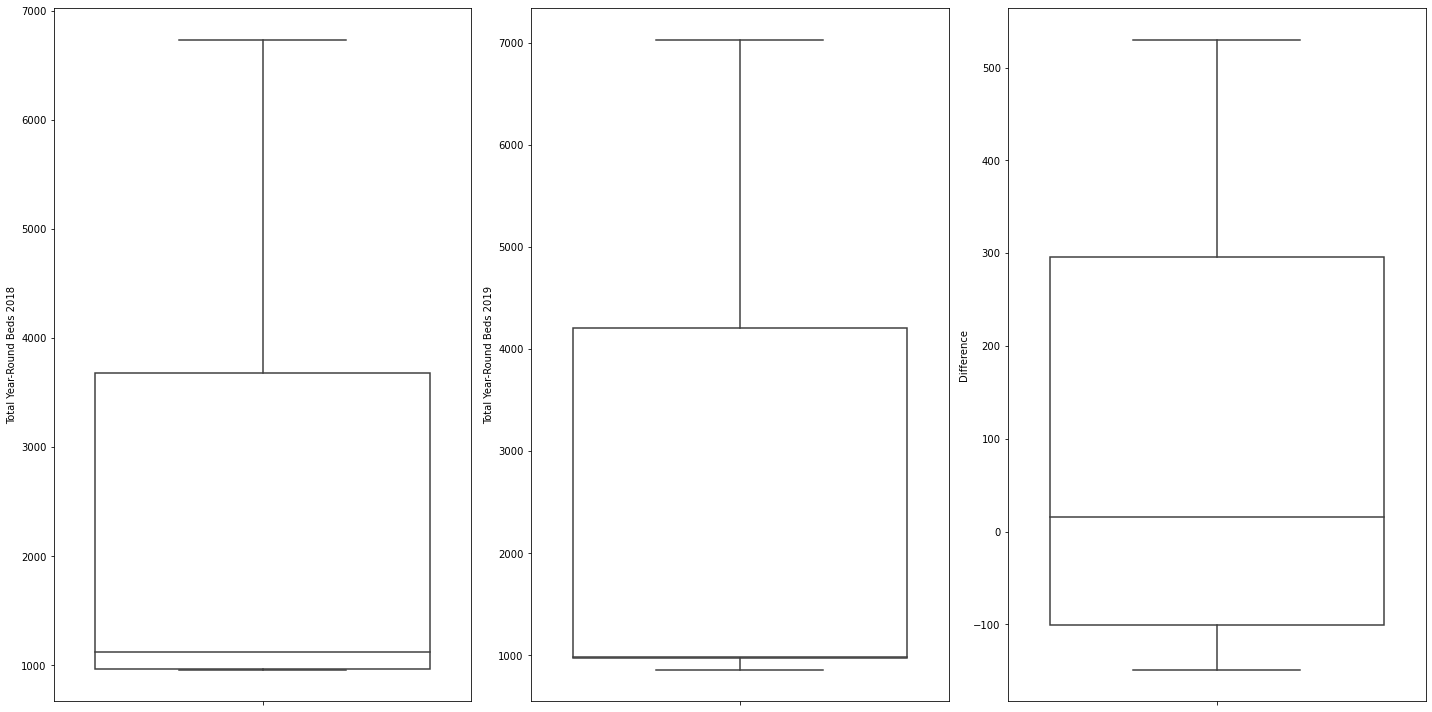


To check pairwise joint distribution of numeric data


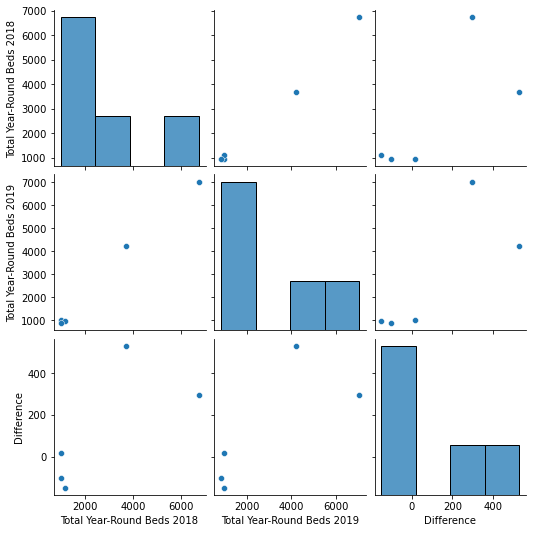


To check time series of numeric data  by daily, monthly and yearly frequency


In [4]:
eda(df)

In [5]:
# Throught this dataset we can easily through the scatter plot that all the points are scattered here and there with no better correlation with each other

In [6]:
# Thorugh the box plot we can see there are no outliers out there but it's better to check it through Z-score

In [7]:
df.isnull().sum()

Project Types                 0
Total Year-Round Beds 2018    0
Total Year-Round Beds 2019    0
Difference                    0
dtype: int64

In [8]:
df.nunique()

Project Types                 5
Total Year-Round Beds 2018    5
Total Year-Round Beds 2019    5
Difference                    5
dtype: int64

# Let's Create Numeric Datafrome for Detecting Outliers

In [9]:
# Selecting those columns which are of numeric data types
numeric_col = df.select_dtypes('number').columns

# Creating new dataframe
numeric_df = pd.DataFrame


# Storing numeric datatype columns in our new dataframe
for i in range(len(numeric_col)):
    numeric_df = df.filter(numeric_col,axis=1)

# Let's Detect and Remove Outliers

In [10]:
from scipy import stats

In [11]:
z = np.abs(stats.zscore(numeric_df))
print(z)

[[0.43490257 0.56825932 1.59953264]
 [0.76028653 0.7427021  0.39794009]
 [0.69112151 0.74595208 1.03915216]
 [0.7642514  0.79388931 0.85261774]
 [1.78075686 1.71428416 0.69017735]]


In [12]:
# Till now we have calculated the Z score
# Now to check whether that data is outlier or not we have to use some threshold
# most commonly for z score the threshold are picked as +3 and -3 but here we have only positive data

In [13]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


In [14]:
# Now with last command we can easily check that our both row and columns array are empty
# This simply means that we are not having any outliers in this dataset

In [15]:
df.to_csv(r'C:\Users\mohit\OneDrive\Desktop\omdena-texas-homelessness\src\tasks\task-2-EDA\cleaned_datasets\Final_HIC_By_LHC_2019.csv')